# Simulation Lab 1: Derivation

## Book exercises

### Chapter 3

Exercises 3.1 - 3.8

### Chapter 4

Exercises 4.1 - 4.9

### Chapter 5

Exercises 5.1 - 5.6

## Coding exercises

In [1]:
from typing import Literal

import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.figure import Figure
import numpy as np
import scipy.stats

N_SAMPLES = 1000
# Random number generator:
# Set the seed to None to get different sequences of values between restarts
# Set it to a number to get the same sequences of values between restarts
RNG = np.random.default_rng(seed=0)

### 1. Empirical mean/variance checks

Consider Binomial distributions with $n=10$.

Generate a random parameterization $p$ for it, without inspection.

Draw a large (e.g., 1000) number of samples.

Estimate the mean and variance from the samples.

Knowing the distribution type, try to recover the parameterization from the mean estimate.

Inspect the true parameterization and get the corresponding statistical mean/variance values.

Compare the estimated mean/variance/parameterization with the true one.

Repeat for the other distributions from class: Bernoulli $(p)$, Geometric $(p)$, and Poisson $(\lambda)$.

In [2]:
def get_rand_param(low: float, high: float, n_decimals=2) -> np.floating:
    return np.round(RNG.uniform(low=low, high=high), decimals=n_decimals)

In [3]:
def est_mean(samples: np.ndarray) -> np.floating:
    # Alternatively:
    # return samples.mean()
    return samples.sum() / samples.size

In [4]:
def est_var(samples: np.ndarray) -> np.floating:
    # Alternatively:
    # return samples.var()
    estimated_mean = est_mean(samples)
    samples_shifted = samples - estimated_mean
    samples_shifted_squared = samples_shifted ** 2
    return samples_shifted_squared.sum() / samples.size

In [5]:
def compare_est_stat(
        distr: scipy.stats.distributions.rv_frozen,
        est_mean: np.floating, est_var: np.floating,
        true_param: np.floating, mean_est_param: np.floating) -> None:
    true_mean: np.floating
    true_var: np.floating
    true_mean, true_var = distr.stats(moments='mv')
    print(
        f"True mean: {true_mean.round(4)} | "
        f"Estimated mean: {est_mean.round(4)} | "
        f"Absolute difference: {np.absolute(true_mean - est_mean).round(4)}")
    print(
        f"True variance: {true_var.round(4)} | "
        f"Estimated variance: {est_var.round(4)} | "
        f"Absolute difference: {np.absolute(true_var - est_var).round(4)}")
    print(f"True parameter: {true_param}")
    print(
        f"Mean-estimated parameter: {mean_est_param.round(4)} | "
        f"Absolute difference: {np.absolute(true_param - mean_est_param).round(4)}")

#### Binomial

In [6]:
binom_n = 10
binom_true_param = get_rand_param(low=0.1, high=0.9, n_decimals=2)
binom_distr = scipy.stats.binom(n=binom_n, p=binom_true_param)
binom_samples = binom_distr.rvs(size=N_SAMPLES, random_state=RNG)
binom_est_mean = est_mean(binom_samples)
binom_est_var = est_var(binom_samples)
print(binom_est_var - binom_samples.var())
binom_mean_est_p: np.floating = binom_est_mean / binom_n
compare_est_stat(
    binom_distr,
    binom_est_mean, binom_est_var,
    binom_true_param,
    binom_mean_est_p)

0.0
True mean: 6.1 | Estimated mean: 6.031 | Absolute difference: 0.069
True variance: 2.379 | Estimated variance: 2.328 | Absolute difference: 0.051
True parameter: 0.61
Mean-estimated parameter: 0.6031 | Absolute difference: 0.0069


#### Bernoulli

In [7]:
bernoulli_true_param = get_rand_param(low=0.1, high=0.9, n_decimals=2)
bernoulli_distr = scipy.stats.bernoulli(p=bernoulli_true_param)
bernoulli_samples = bernoulli_distr.rvs(size=N_SAMPLES, random_state=RNG)
bernoulli_est_mean = est_mean(bernoulli_samples)
bernoulli_est_var = est_var(bernoulli_samples)
bernoulli_mean_est_p: np.floating = bernoulli_est_mean
compare_est_stat(
    bernoulli_distr,
    bernoulli_est_mean, bernoulli_est_var,
    bernoulli_true_param,
    bernoulli_mean_est_p)

True mean: 0.76 | Estimated mean: 0.765 | Absolute difference: 0.005
True variance: 0.1824 | Estimated variance: 0.1798 | Absolute difference: 0.0026
True parameter: 0.76
Mean-estimated parameter: 0.765 | Absolute difference: 0.005


#### Geometric

In [8]:
geom_true_param = get_rand_param(low=0.1, high=0.9, n_decimals=2)
geom_distr = scipy.stats.geom(p=geom_true_param)
geom_samples = geom_distr.rvs(size=N_SAMPLES, random_state=RNG)
geom_est_mean = est_mean(geom_samples)
geom_est_var = est_var(geom_samples)
geom_mean_est_p: np.floating = 1 / geom_est_mean
compare_est_stat(
    geom_distr,
    geom_est_mean, geom_est_var,
    geom_true_param,
    geom_mean_est_p)

True mean: 1.2048 | Estimated mean: 1.198 | Absolute difference: 0.0068
True variance: 0.2468 | Estimated variance: 0.2368 | Absolute difference: 0.01
True parameter: 0.83
Mean-estimated parameter: 0.8347 | Absolute difference: 0.0047


#### Poisson

In [9]:
poisson_true_param = get_rand_param(low=1, high=10, n_decimals=0)
poisson_distr = scipy.stats.poisson(mu=poisson_true_param)
poisson_samples = poisson_distr.rvs(size=N_SAMPLES, random_state=RNG)
poisson_est_mean = est_mean(poisson_samples)
poisson_est_var = est_var(poisson_samples)
poisson_mean_est_p: np.floating = poisson_est_mean
compare_est_stat(
    poisson_distr,
    poisson_est_mean, poisson_est_var,
    poisson_true_param,
    poisson_mean_est_p)

True mean: 5.0 | Estimated mean: 5.033 | Absolute difference: 0.033
True variance: 5.0 | Estimated variance: 4.7479 | Absolute difference: 0.2521
True parameter: 5.0
Mean-estimated parameter: 5.033 | Absolute difference: 0.033


### 2. P.M.F. and C.D.F. plotting

Consider again the samples from each distribution in the last exercise.

Use them to plot each distribution's probability mass function and cumulative probability function.

In [10]:
def plot(samples: np.ndarray, type: Literal["pmf", "cdf"], title: str) -> Figure:
    ax: Axes
    fig, ax = plt.subplots()
    values = np.arange(samples.min(), samples.max()  + 1)

    if type == "pmf":
        counts = np.array([(samples == v).sum()/len(samples) for v in values])
        ylabel = "P(X = x)"
    else:
        counts = np.array([(samples <= v).sum()/len(samples) for v in values])
        ylabel = "P(X <= x)"

    ax.bar(values, counts, width=0.9)
    ax.set_xticks(values)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel(ylabel)

    return fig

#### Binomial

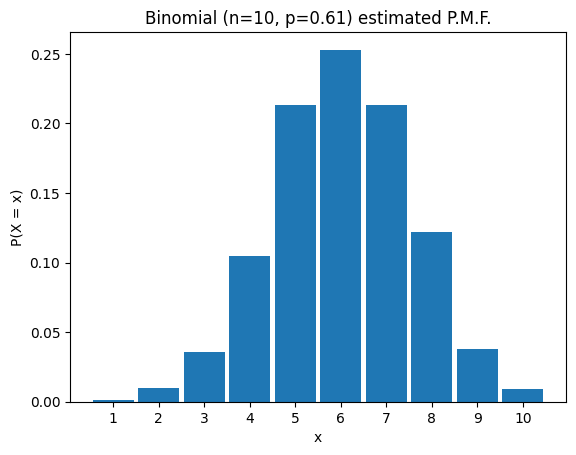

In [11]:
fig_binom_pmf = plot(
    binom_samples, "pmf", f"Binomial (n={binom_n}, p={binom_true_param}) estimated P.M.F.")

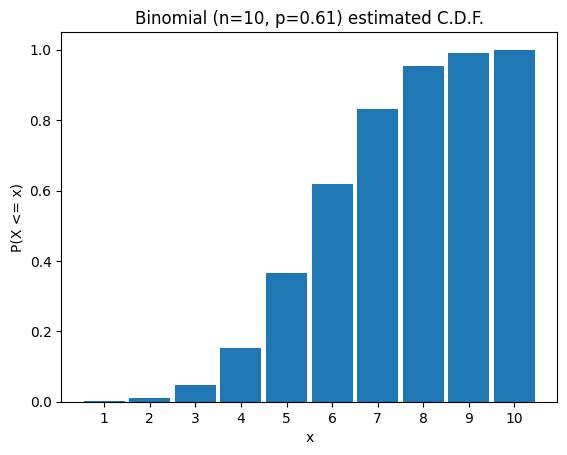

In [12]:
fig_binom_cdf = plot(
    binom_samples, "cdf", f"Binomial (n={binom_n}, p={binom_true_param}) estimated C.D.F.")

#### Bernoulli

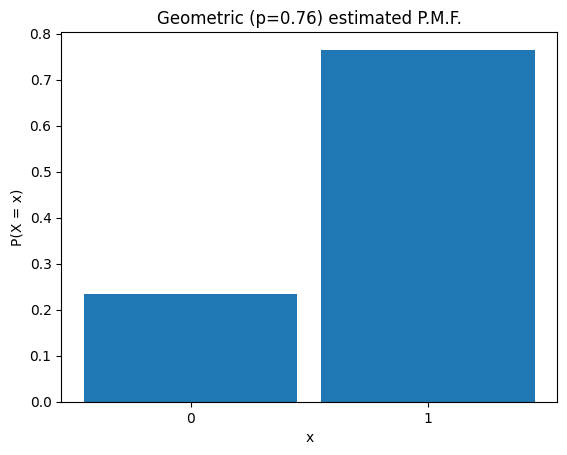

In [13]:
fig_bernoulli_pmf = plot(bernoulli_samples, "pmf", f"Geometric (p={bernoulli_true_param}) estimated P.M.F.")

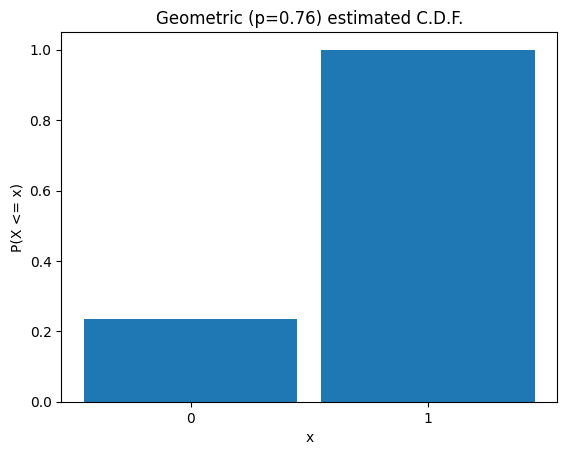

In [14]:
fig_bernoulli_cdf = plot(bernoulli_samples, "cdf", f"Geometric (p={bernoulli_true_param}) estimated C.D.F.")

#### Geometric

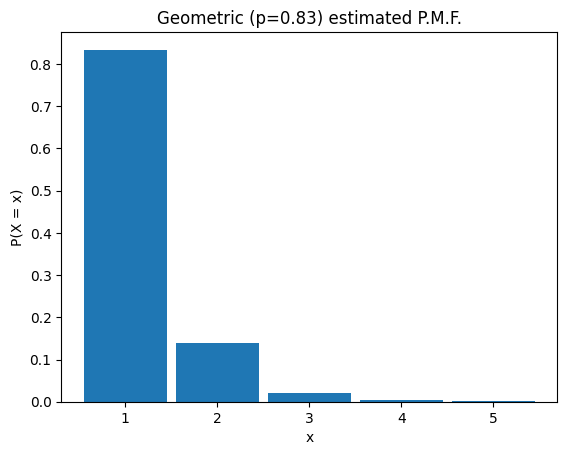

In [15]:
fig_geom_pmf = plot(geom_samples, "pmf", f"Geometric (p={geom_true_param}) estimated P.M.F.")

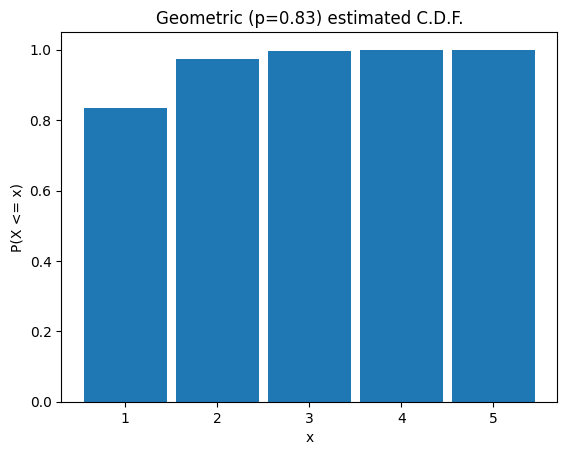

In [16]:
fig_geom_cdf = plot(geom_samples, "cdf", f"Geometric (p={geom_true_param}) estimated C.D.F.")

#### Poisson

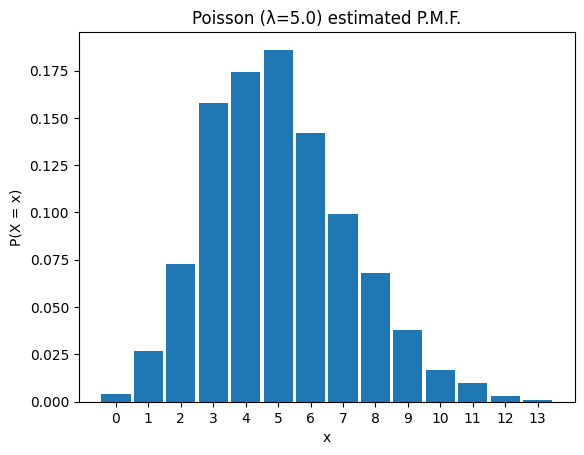

In [17]:
fig_poisson_pmf = plot(poisson_samples, "pmf", f"Poisson (λ={poisson_true_param}) estimated P.M.F.")

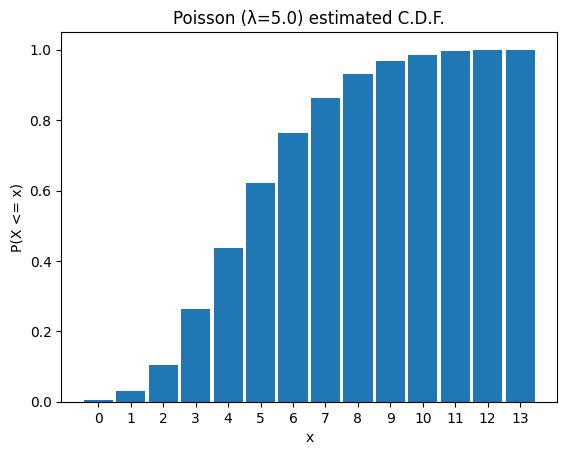

In [18]:
fig_poisson_cdf = plot(poisson_samples, "cdf", f"Poisson (λ={poisson_true_param}) estimated C.D.F.")

### 3. Linearity of expectation

Consider the drinking game example from the lectures.

People at the party do not remember which cup was originally theirs, so they grab one at random.

Because sampling happens without replacement, the people's random variables are not independent.

Thus, verify that linearity of expectation holds via simulation.

In [19]:
n_people = 10
# Index i represents the s-th simulation
# The value at the index is the number of people who got back their cup
drinking_samples = np.empty(N_SAMPLES, dtype=int)

for i in range(N_SAMPLES):
    # Index p represents the person p
    # The value at the index is the person whose cup they pick
    choices = RNG.choice(n_people, size=n_people, replace=False)
    # The number of people who pick their own cup
    outcome = (choices == np.arange(n_people)).sum()
    drinking_samples[i] = outcome

In [20]:
drinking_simulations_mean = est_mean(drinking_samples)
f"Mean for the number of people who get their own cup back over the simulations: {drinking_simulations_mean:.4f}"

'Mean for the number of people who get their own cup back over the simulations: 0.9950'